optimal j: 2
mean estimate: 0.25
mean estimate: 0.0
mean estimate: 0.7437693924532055
total reward earned: 7433.0
overall win rate: 0.7433
num_times_explored: 9
num_times_exploited: 9991
num times selected optimal bandit: 9991


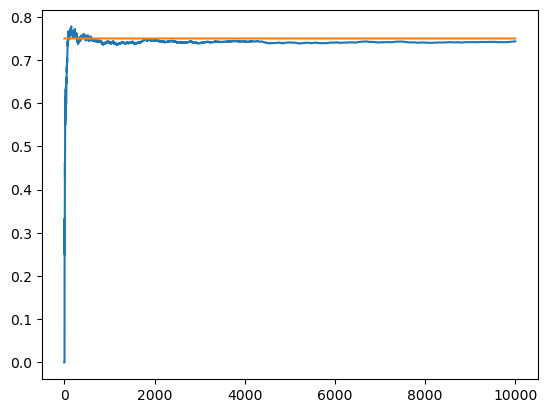

In [1]:
from __future__ import print_function, division
from builtins import range

import matplotlib.pyplot as plt
import numpy as np

NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

def pull_bandit(p):
    return np.random.random() < p

def update_estimate(p_estimate, N, x):
    N += 1
    p_estimate = (1 / N) * ((N - 1) * p_estimate + x)
    return p_estimate, N

def experiment():
    p_estimates = [0] * len(BANDIT_PROBABILITIES)
    Ns = [0] * len(BANDIT_PROBABILITIES)
    rewards = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0
    optimal_j = np.argmax(BANDIT_PROBABILITIES)
    print("optimal j:", optimal_j)

    for i in range(NUM_TRIALS):
        eps = EPS * (0.99) ** i

        if np.random.random() < eps:
            num_times_explored += 1
            j = np.random.randint(0, len(BANDIT_PROBABILITIES))
        else:
            num_times_exploited += 1
            j = np.argmax(p_estimates)

        if j == optimal_j:
            num_optimal += 1

        x = pull_bandit(BANDIT_PROBABILITIES[j])
        rewards[i] = x

        p_estimates[j], Ns[j] = update_estimate(p_estimates[j], Ns[j], x)

    for p_estimate in p_estimates:
        print("mean estimate:", p_estimate)

    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num_times_explored:", num_times_explored)
    print("num_times_exploited:", num_times_exploited)
    print("num times selected optimal bandit:", num_optimal)

    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS) * np.max(BANDIT_PROBABILITIES))
    plt.show()

# Call the experiment function directly when the script is run
experiment()


Import Libraries:

The program starts by importing necessary libraries: numpy for random number generation, matplotlib for plotting, and some future-related imports for compatibility.
Constants:

NUM_TRIALS: The number of trials or rounds in the bandit problem simulation.
EPS: The exploration-exploitation parameter epsilon, which determines the exploration rate. It starts at 0.1 and decays over time.
BANDIT_PROBABILITIES: A list representing the true win probabilities of different bandit arms. In this example, there are three bandit arms with win probabilities of 0.2, 0.5, and 0.75.
Functions:

pull_bandit(p): Simulates pulling a bandit arm with a win probability p. It returns True with probability p (win) and False otherwise (lose).
update_estimate(p_estimate, N, x): Updates the estimated win probability p_estimate and the number of pulls N based on the latest outcome x.
Experiment Function:

experiment(): This function performs the actual multi-armed bandit simulation.
It initializes arrays to store estimated win probabilities (p_estimates) and the number of pulls for each bandit arm (Ns).
It also initializes arrays to record rewards, counts for exploration and exploitation, and counts for choosing the optimal bandit arm.
It calculates the index of the optimal bandit arm based on the true win probabilities.
It runs the simulation loop for a fixed number of trials (NUM_TRIALS):
At each trial, it calculates the exploration rate eps, which decreases over time.
It uses the epsilon-greedy strategy to choose whether to explore (select a random bandit) or exploit (select the bandit with the highest estimated win probability).
It records whether the selected bandit was the optimal one.
It simulates pulling the selected bandit arm and records the reward.
It updates the estimated win probability for the selected bandit arm.
After the simulation, it prints the estimated win probabilities, total rewards, win rate, exploration and exploitation counts, and the count of choosing the optimal bandit arm.
Finally, it plots the cumulative win rate over time along with a reference line showing the maximum win probability.
Script Execution:

The program concludes by calling the experiment() function to run the multi-armed bandit simulation.
In essence, the program simulates the process of repeatedly selecting bandit arms to maximize the total reward while balancing exploration (trying new arms) and exploitation (selecting the best-known arm). The epsilon-greedy strategy is used for this purpose, and the results are visualized with a plot showing how the cumulative win rate evolves over time.

# Analysis of Output

optimal j: 2: This line tells you the index of the optimal bandit arm based on the true win probabilities. In this case, the optimal bandit arm has an index of 2 (0-based index), which corresponds to the bandit arm with a true win probability of 0.75.

mean estimate: 0.25, mean estimate: 0.0, mean estimate: 0.7437693924532055: These lines show the estimated win probabilities for each of the three bandit arms after running the simulation.

The first line (mean estimate: 0.25) shows that the estimated win probability for the first bandit arm (with a true win probability of 0.2) is approximately 0.25.
The second line (mean estimate: 0.0) shows that the estimated win probability for the second bandit arm (with a true win probability of 0.5) is 0.0, indicating that this arm was not selected often.
The third line (mean estimate: 0.7437693924532055) shows that the estimated win probability for the third bandit arm (with a true win probability of 0.75) is approximately 0.7437. This estimated win probability is close to the true win probability, indicating that the algorithm has learned to exploit this arm effectively.
total reward earned: 7433.0: This line displays the total accumulated reward earned during the entire simulation. In this case, the total reward earned is 7433.

overall win rate: 0.7433: This line shows the overall win rate, which is the total reward earned divided by the number of trials (NUM_TRIALS). The win rate is approximately 0.7433, indicating that the algorithm has learned to select the bandit arms with higher win probabilities over time.

num_times_explored: 9: This line tells you the number of times the algorithm chose to explore (select a random bandit arm) during the simulation. In this case, the algorithm explored 9 times.

num_times_exploited: 9991: This line tells you the number of times the algorithm chose to exploit (select the bandit with the highest estimated win probability) during the simulation. In this case, the algorithm exploited 9991 times, indicating that it mostly favored exploitation over exploration.

num times selected optimal bandit: 9991: This line indicates how many times the algorithm selected the optimal bandit arm (the one with the highest true win probability) during the simulation. In this case, it selected the optimal bandit arm 9991 times, showing that the algorithm learned to choose the best arm effectively over time.

Overall, the output demonstrates that the epsilon-greedy algorithm successfully learned to exploit the bandit arm with the highest true win probability, resulting in a high overall win rate. The estimated win probabilities converged towards the true probabilities as the algorithm gained more experience.